<a href="https://colab.research.google.com/github/fatimabalig/codealpha_tasks/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


In [2]:
# Step 2: Load Dataset
data = pd.read_csv('/content/Advertising.csv')
print(data.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [3]:
# Step 3: Data Preprocessing
# Check for missing values
print(data.isnull().sum())

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [5]:
# Split the data into features and target variable
X = data.drop('Sales', axis=1)  # Features (advertising budgets)
y = data['Sales']  # Target variable (sales)


In [6]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 5: Model Selection and Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Step 6: Model Evaluation
# Make predictions
y_pred = model.predict(X_test)

In [9]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [10]:
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}")

MAE: 1.465060105010293, MSE: 3.1990044685889067, RMSE: 1.7885761008659673, R2: 0.898648915141708


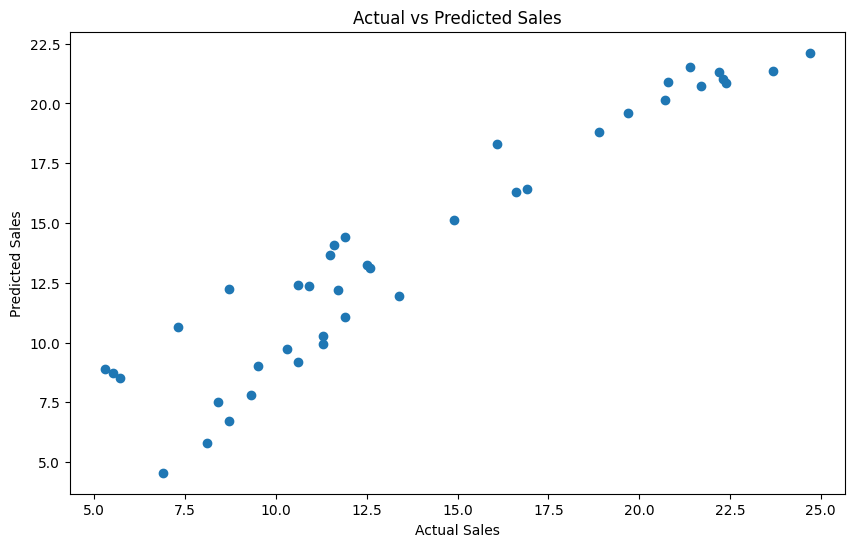

In [11]:
# Step 7: Plot Predicted vs Actual Sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [12]:
# Step 8: Feature Importance (for Random Forest)
# Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [13]:
# Plot Feature Importance
importances = rf_model.feature_importances_
features = X.columns


In [14]:
# Sort the importances
sorted_indices = np.argsort(importances)[::-1]
sorted_features = [features[i] for i in sorted_indices]
sorted_importances = importances[sorted_indices]

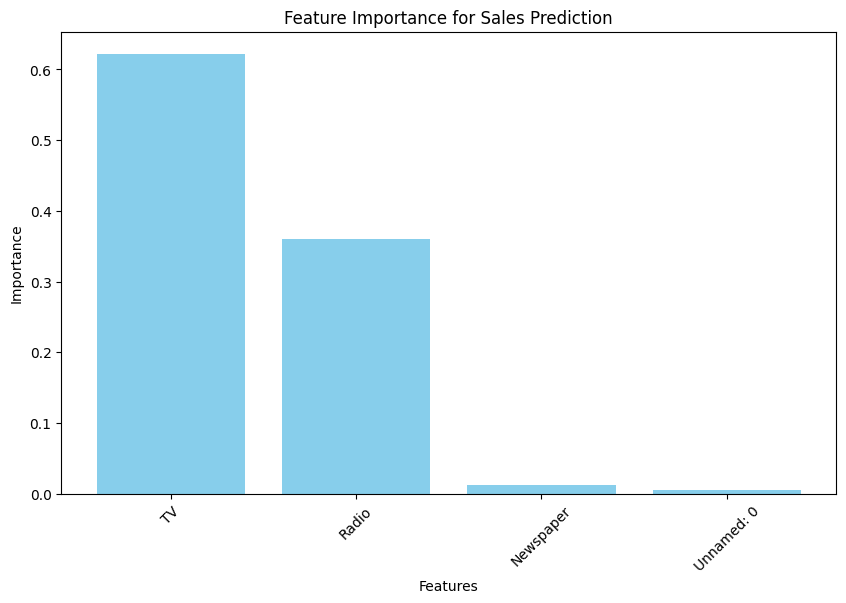

In [15]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Sales Prediction')
plt.xticks(rotation=45)
plt.show()